In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis and Data Preprocessing

### 1. Loading the dataset
The dataset is taken from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud/download">Kaggle Credit Card Fraud Detection Dataset</a>

In [2]:
df = pd.read_csv('creditcard.csv')

### 2. Viewing the first 5 entries of the dataset

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### 3. Getting the dataset shape

In [4]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


### 4. A peek at the dataset

In [5]:
df.sample(5)
# df.sample returns a random sample of items from an axis of the object

Time        V1        V2        V3        V4        V5        V6  \
257625  158263.0  2.039511 -0.127281 -1.214499  0.200015  0.130096 -0.578821   
150709   93941.0 -0.398982  1.005287 -0.823009 -0.434982  1.058285 -0.409892   
154222  100921.0  1.936534 -0.524812  0.144726  0.380810 -0.828675  0.117971   
210376  137954.0 -0.804544  0.899234  1.937108  1.908647  0.909023  1.054456   
206579  136266.0  1.710412 -0.177393 -2.423228  0.851039  0.570935 -0.825292   

              V7        V8        V9  ...       V21       V22       V23  \
257625  0.050003 -0.129698  0.325451  ... -0.259569 -0.645795  0.287029   
150709  0.258440  0.458145  0.938948  ... -0.406732 -1.072239  0.113103   
154222 -1.123789  0.159111  2.497306  ... -0.082328  0.106968  0.285862   
210376  0.615521  0.139249 -0.978655  ...  0.280151  0.893455 -0.107809   
206579  0.500599 -0.273878  0.775121  ... -0.080318 -0.316022 -0.057084   

             V24       V25       V26       V27       V28  Amount  Class  
257625 -0.469318 -0.294091  0.208787 -0.072571 -0.075060    1.29      0  
150709  0.014865 -0.411553  0.084811  0.065094 -0.041475    8.99      0  
154222 -0.441037 -0.640067  0.449714 -0.043850 -0.058154   14.95      0  
210376  0.679102  0.075138 -0.202436 -0.393913 -0.195669   24.02      0  
206579  0.443548  0.156303 -0.336014 -0.012914  0.028351  172.68      0  

[5 rows x 31 columns]

### 5. Finding more details of the dataset 

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking if there are any null values in our dataset
df.isnull().values.any()

False

In [8]:
# numerical summary -> only non-anonymized columns of interest (not the columns encoded by PCA)
pd.set_option('precision', 3) # to get the result upto 3 decimal places
df.loc[:, ['Time', 'Amount']].describe() # Statistics of the columns not encoded by PCA

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

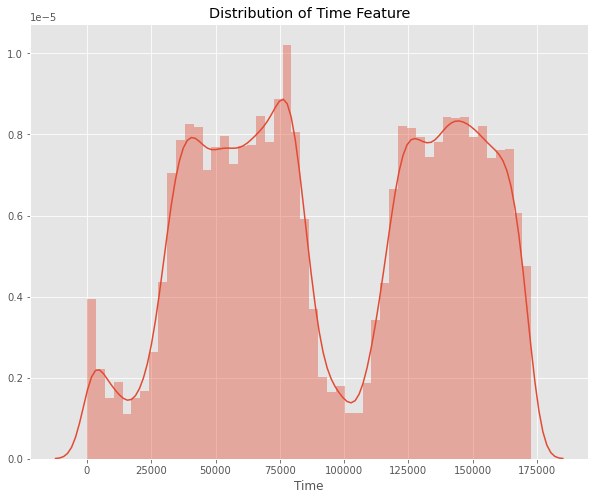

In [9]:
# visualizations of the time feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

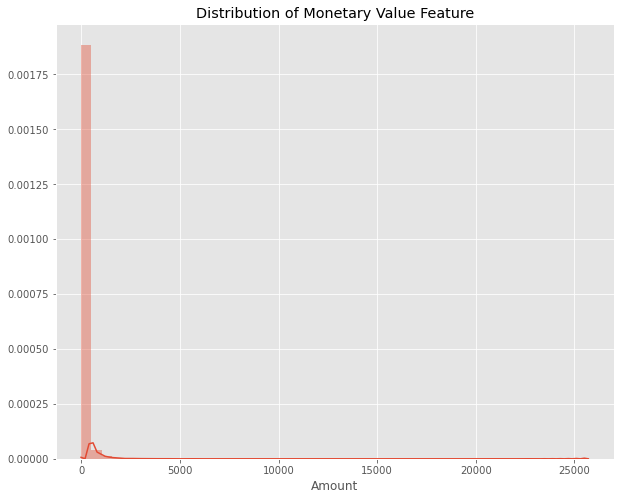

In [10]:
# visualisation of the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

We find that - around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [11]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


### 6. Visualising the number of fraudulent and non - fraudulent transactions in the dataset

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

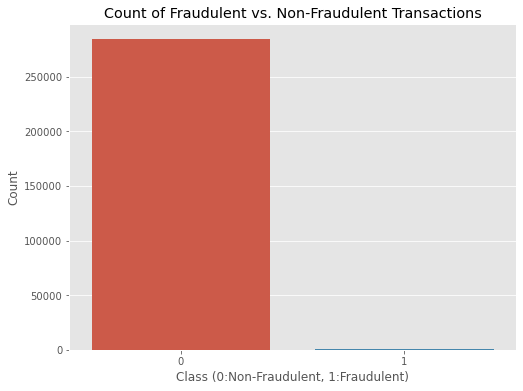

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts.index, y = counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Thus, we find that our dataset is **highly unbalanced**. <br>
The number of non - fraudulent transactions is much high compared to the fraudulent transactions.

### 7. Separating the fraudulent and non - fraudulent parts of the dataset

In [13]:
# 'Class' = 1 - fraudulent transactions
fraud = df[df['Class'] == 1]
# 'Class' = 0 - non - fraudulent or normal transactions
normal = df[df['Class'] == 0] 

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


### 8. How different are the amount of money used in different transaction classes?

In [15]:
fraud.Amount.describe()

count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

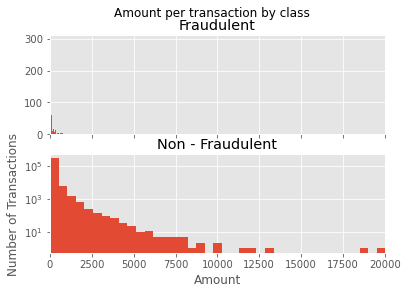

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Non - Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### 9. Checking if fraudulent transactions occur more often during certain time frame

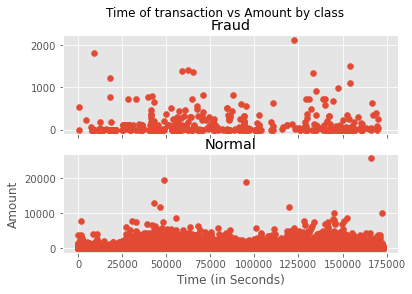

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 10. Finding correlations - that is determining how different features affect the Class (Fraud or not)

In [19]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1.0, 'Heatmap of Correlation')

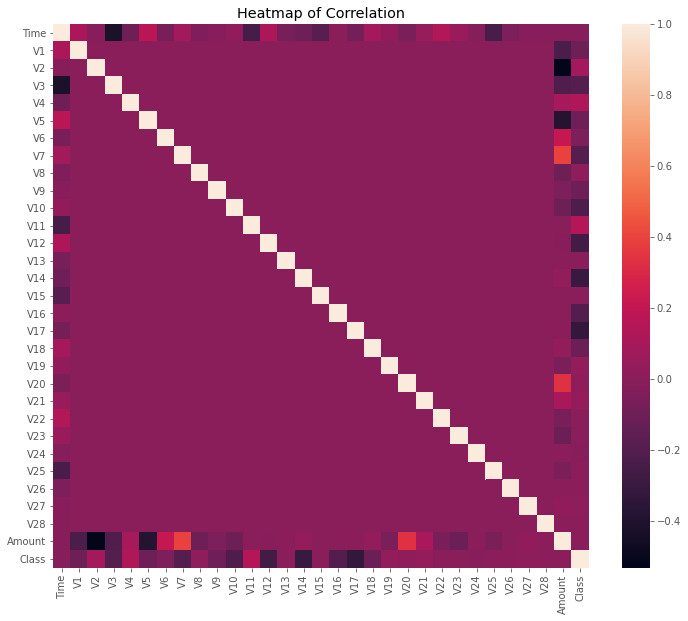

In [20]:
# heatmap - uses color in order to communicate a value to the reader.
corr = df.corr()
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

From the heatmap, we get an idea of to what degree different features contribute to the transaction being fraudulent or not.

In [21]:
# skewness
# Finding the skewness of the features 
# to ensure that they are not much deviated from the Gaussian distribution
# As presence of much skewness in features may violate our training algo assumptions
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Data Preprocessing

### 1. Scaling Amount and Time

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
# scaling the time column
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [23]:
# scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
# concatenating newly created scaled columns with original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
# viewing a random sample of items from an axis of the object
df.sample(5)

Time     V1     V2     V3     V4     V5     V6         V7     V8  \
124115   77182.0 -1.411  2.268 -2.298  1.871  0.249 -1.209 -1.359e+00  1.103   
282474  170922.0  1.689 -1.042 -0.441  0.709 -0.991 -0.439 -3.792e-01 -0.217   
118455   75084.0  0.837 -1.237  0.244  0.609 -1.095 -0.012 -3.622e-01 -0.061   
226720  144771.0 -0.938  0.223 -0.465  0.316  0.253 -0.194  4.318e-01  0.304   
196591  131587.0  1.952 -0.068 -1.769  0.323  0.211 -0.750 -6.577e-04 -0.071   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
124115 -1.317  ... -0.196 -0.464  0.118 -0.485  0.374  0.188     1.0      1   
282474 -0.593  ...  0.274 -0.164 -0.560 -0.983  0.050  0.017   205.0      0   
118455 -0.653  ... -0.323 -0.504  0.377 -0.274  0.012  0.075   282.0      0   
226720  0.313  ...  0.349  0.760  0.142  0.835 -0.056 -0.064   105.0      0   
196591  0.865  ...  0.127 -0.538 -0.092 -0.083 -0.013 -0.030    30.0      0   

        scaled_amount  scaled_time  
124115         -0.349       -0.371  
282474          0.466        1.603  
118455          0.774       -0.415  
226720          0.067        1.052  
196591         -0.233        0.774  

[5 rows x 33 columns]

In [25]:
# dropping old (unscaled) amount and time columns
df.drop(['Amount', 'Time'], axis = 1, inplace = True)

### 2. Splitting Data into Train and Test sets

In [26]:
# manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256420, 31)
Test Shape: (28387, 31)


In [27]:
# resetting the indices 
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

### 3. Creating a subsample data set with balanced class distributions

In [28]:
# how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 438 fraudulent transactions in the train data.


In [29]:
# storing the non - fraudulent and fraudulent transactions in the train data
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [30]:
# randomly selecting 449 random non - fraudulent transactions
selected = non_fraud.sample(no_of_frauds)
selected.shape

(438, 31)

In [31]:
# printing the first 5 selected items
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
21057   1.278 -1.244 -0.522 -1.618  0.843  3.787 -1.634  0.986 -0.244  0.534   
23998  -1.837  2.092  0.747  0.015 -1.037 -1.340  0.040  0.735 -0.317  0.138   
198562 -0.776  0.945  1.277 -0.521 -0.014  0.223  0.010  0.619 -0.367 -0.996   
151681  2.023 -0.375 -0.710  0.081  0.041  0.657 -0.710  0.162  1.072 -0.032   
227131 -0.293  1.142 -0.126 -0.581  0.203 -1.075  0.706  0.195 -0.292 -0.655   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
21057   ...  0.626 -0.201  1.061  0.592 -0.039  0.039  0.031      0   
23998   ... -0.523  0.164  0.909 -0.038  0.054  0.344  0.177      0   
198562  ... -0.127 -0.012  0.756 -0.283 -0.588  0.033  0.076      0   
151681  ...  0.994 -0.010 -0.080  0.106 -0.157  0.042 -0.048      0   
227131  ... -0.563  0.112 -0.103 -0.424  0.148  0.124  0.035      0   

        scaled_amount  scaled_time  
21057          -0.033       -1.307  
23998          -0.317       -1.276  
198562         -0.313        0.997  
151681         -0.349        0.514  
227131         -0.317        1.283  

[5 rows x 31 columns]

In [32]:
# resetting the indices
selected.reset_index(drop = True, inplace = True)
fraud.reset_index(drop = True, inplace = True)

In [33]:
# concatenating both (449 fraud and non - fraud transactions) 
# into a subsample data set with equal class distribution
subsample = pd.concat([selected, fraud])
len(subsample) # 449 (fraud) + 449 (non - fraud) = 898

876

In [34]:
# shuffling our data set
subsample = subsample.sample(frac = 1).reset_index(drop = True)

subsample.head(10)

V1     V2      V3     V4      V5     V6      V7     V8     V9     V10  \
0  -2.349  1.513  -2.647  1.754   0.406 -2.188  -0.687 -0.548 -0.100  -1.672   
1  -0.083 -3.936  -2.617  0.163  -1.401 -0.809   1.502 -0.471  1.520  -1.134   
2 -10.632  7.252 -17.681  8.204 -10.167 -4.510 -12.982  6.784 -4.659 -14.925   
3   1.124 -1.542  -0.738  1.786  -0.084  1.919  -0.484  0.482 -0.448   0.993   
4   1.039  0.146   1.703  2.800  -0.962  0.287  -0.684  0.321  0.214   0.475   
5  -0.899 -1.356   1.795 -2.419  -0.846  2.311  -0.355  0.783  0.396  -0.970   
6  -3.843  3.375  -5.493  6.136   2.797 -2.646  -1.669 -2.618 -3.946  -4.565   
7   1.349 -1.044   0.030 -1.344  -1.110 -0.747  -0.501 -0.254 -2.211   1.348   
8  -1.101 -1.675  -0.573  5.618   0.766  0.441   1.935 -1.020 -0.193   1.784   
9   0.202  1.176   0.346  2.882   1.407 -0.504   1.439 -0.396 -1.555   1.082   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ... -0.595  0.258  0.062 -0.354 -1.153 -0.736  0.734      1         -0.334   
1  ... -0.182 -0.921  0.112 -0.072 -1.126 -0.171  0.126      1          4.033   
2  ...  0.696 -1.138  0.459  0.386  0.522 -1.417 -0.488      1          0.400   
3  ...  0.471 -0.031 -1.515 -1.059  2.311 -0.187 -0.026      0          1.179   
4  ...  0.040  0.150  0.569  0.120 -0.043  0.053  0.036      0         -0.341   
5  ...  1.725  0.442 -0.332 -0.563 -0.220  0.180  0.194      0          0.566   
6  ...  0.720  0.451 -0.258  0.656  0.557  0.739 -0.203      1         -0.349   
7  ... -1.189  0.167  0.029  0.152 -0.509  0.015  0.030      0          0.006   
8  ... -0.209  0.345  1.091 -0.687  0.076  0.034 -0.833      1          2.186   
9  ...  0.841 -0.370 -0.026  0.492  0.235 -0.280 -0.332      1         -0.323   

   scaled_time  
0        1.373  
1        1.253  
2       -0.020  
3        1.441  
4       -0.228  
5        0.790  
6       -1.102  
7       -1.368  
8        0.333  
9        1.303  

[10 rows x 31 columns]

### 4. Visualisation of fraud and non - fraud classes in subsample dataset created

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

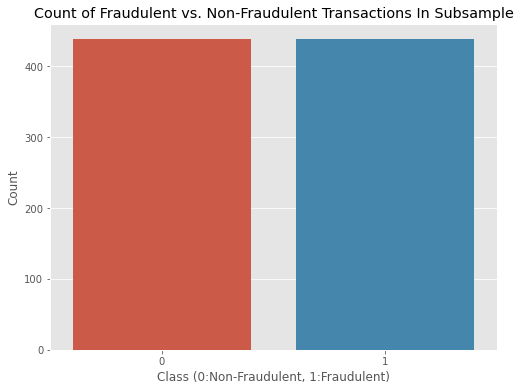

In [35]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

We find that, the distribution of fraud and non - fraud transactions is balanced in our subsample dataset unlike the original highly unbalanced dataset

In [36]:
# taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -4.248e-01
V2             4.829e-01
V3            -5.686e-01
V4             7.141e-01
V5            -3.721e-01
V6            -3.765e-01
V7            -4.745e-01
V8             3.042e-02
V9            -5.560e-01
V10           -6.230e-01
V11            6.818e-01
V12           -6.819e-01
V13           -4.115e-02
V14           -7.426e-01
V15           -4.389e-02
V16           -6.081e-01
V17           -5.652e-01
V18           -4.715e-01
V19            2.799e-01
V20            1.568e-01
V21            1.176e-01
V22           -2.367e-03
V23           -7.630e-04
V24           -1.028e-01
V25            2.204e-02
V26            6.465e-02
V27            9.264e-02
V28            8.174e-02
Class          1.000e+00
scaled_amount  7.293e-02
scaled_time   -1.162e-01

In [37]:
# negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.569
V9  -0.556
V10 -0.623
V12 -0.682
V14 -0.743
V16 -0.608
V17 -0.565

In [38]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.714
V11    0.682
Class  1.000

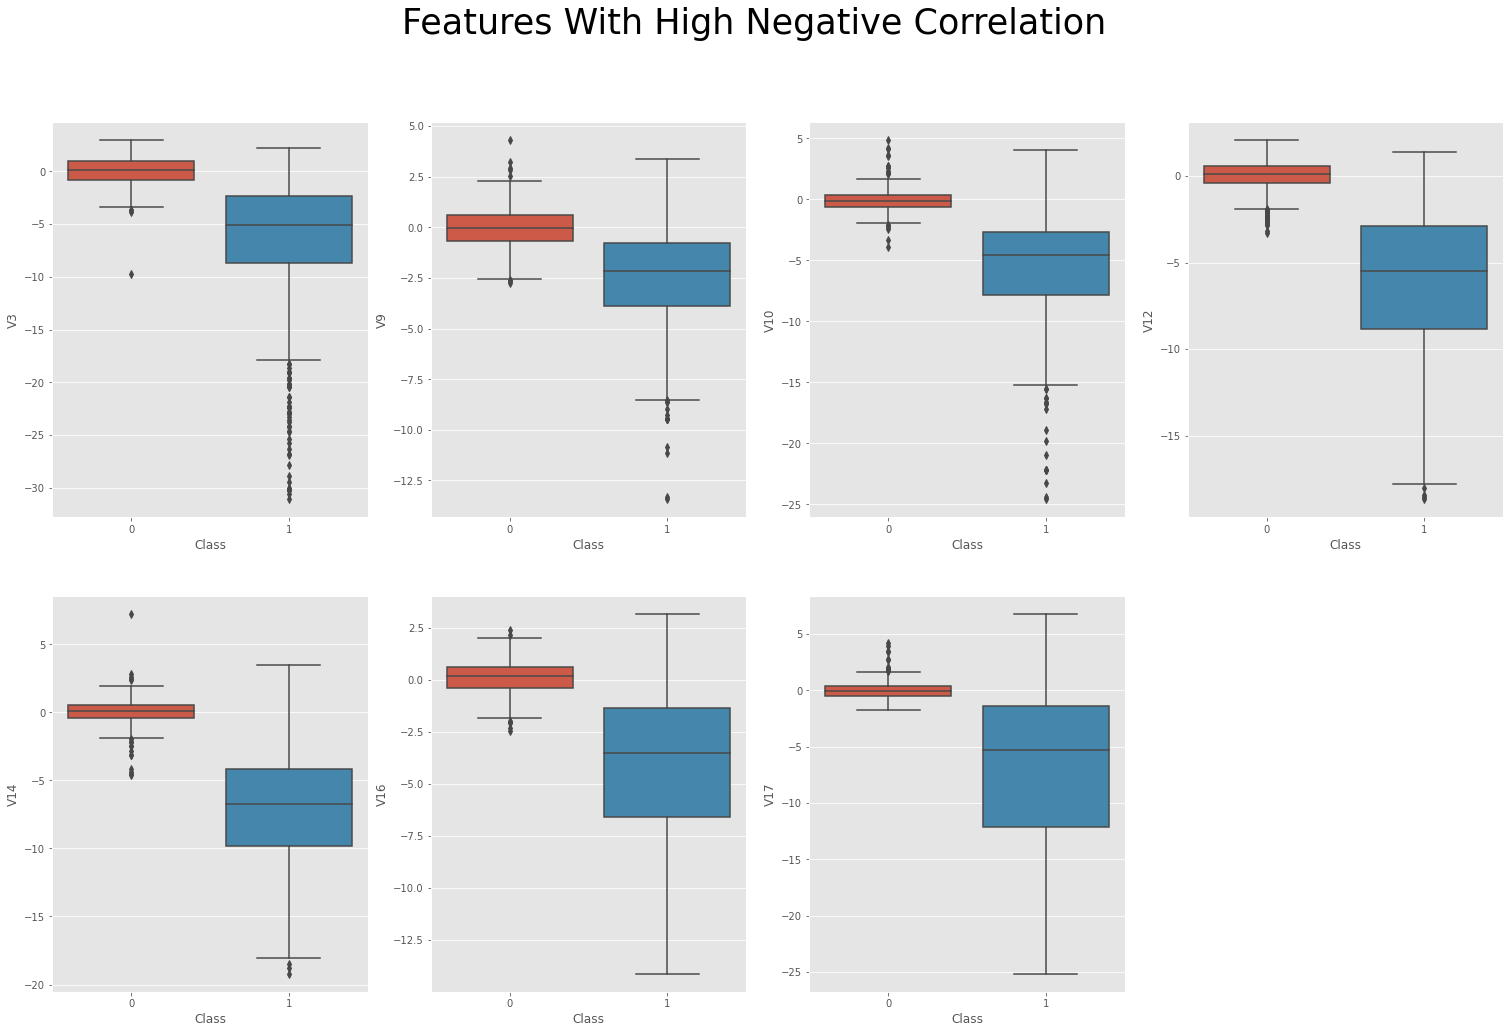

In [39]:
# visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

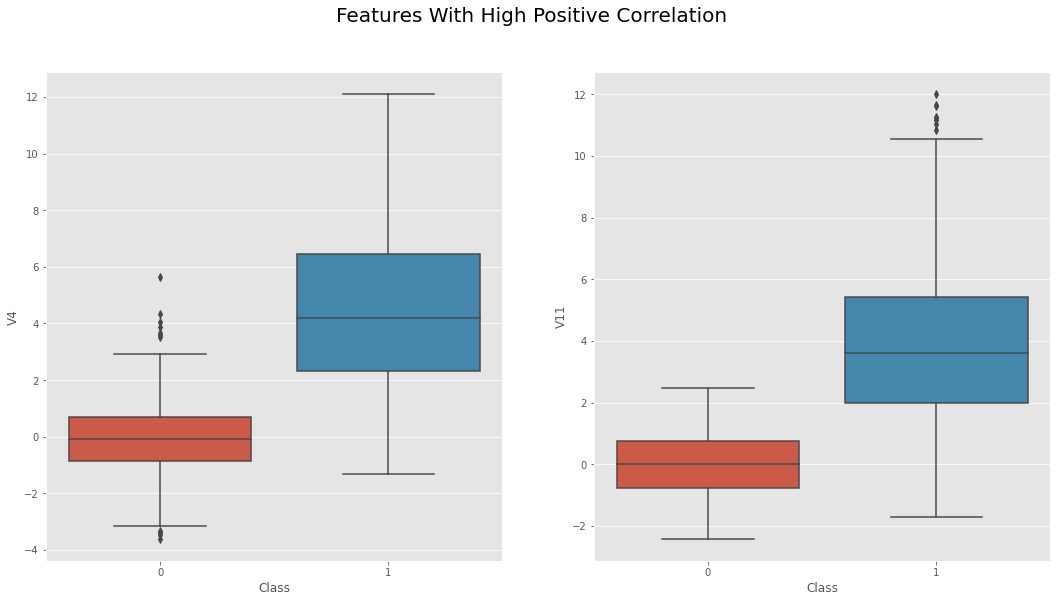

In [40]:
# visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### 5. Extreme Outlier Removal

In [41]:
# Only removing the extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [42]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 876 transactions by 259 transactions to 617 transactions.


### 6. Dimensionality Reduction

In [43]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [44]:
# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

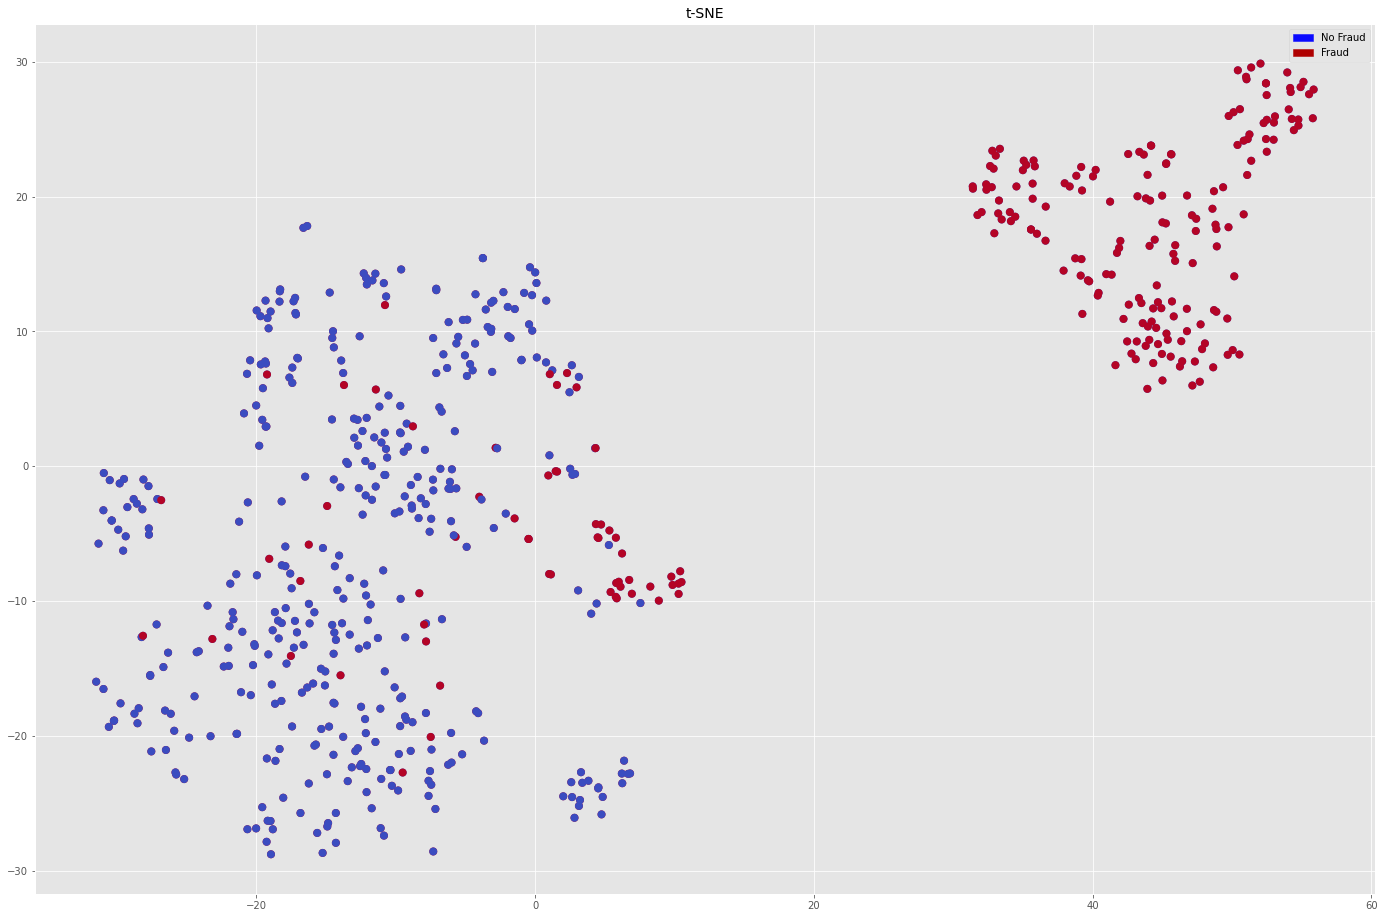

In [45]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


# Classification Algorithms

In [48]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [49]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
conda install -c anaconda py-xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - py-xgboost -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrai

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


## Spot - Checking Algorithms 

Spot-checking algorithms is about getting a quick assessment of a bunch of different algorithms on your machine learning problem so that you know what algorithms to focus on and what to discard.

In [52]:
# Spot - Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

In [53]:
# testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.967966 (0.027261)
LDA: 0.967136 (0.028481)
KNN: 0.956688 (0.034543)
CART: 0.880175 (0.028468)
SVM: 0.965715 (0.023436)
XGB: 0.960334 (0.025963)
RF: 0.955289 (0.032446)


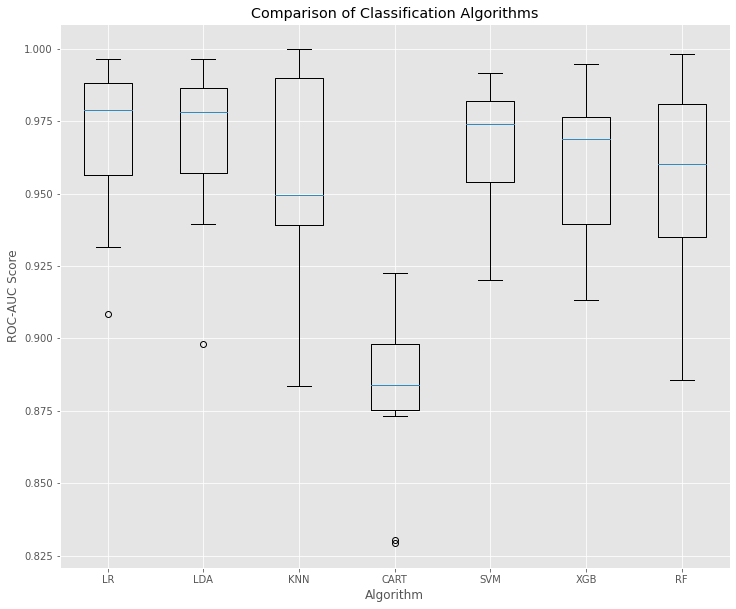

In [54]:
# Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

We find that RF, XGBOOST Algorithms give the greatest test accuracy and hence proceed with this algorithm to train our model

In [55]:
conda install -c anaconda graphviz 

Solving environment: done

## Package Plan ##

  environment location: /Users/medhatiwari/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         127 KB  anaconda
    ------------------------------------------------------------
                                           Total:         127 KB

The following packages will be UPDATED:

  ca-certificates                               2020.7.22-0 --> 2020.10.14-0



ca-certificates-2020 | 127 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [56]:
# visualizing RF
RandomForest_model = RandomForestClassifier(n_estimators = 10)

# Train
RandomForest_model.fit(X_train, y_train)

# Extract single tree
estimator = RandomForest_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [59]:
# testing the model 
RandomForest_predict = RandomForest_model.predict(X_test)

In [60]:
# printing the test set results
print(RandomForest_predict)

[1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 0]


In [61]:
# Checking different accuracies for the RF model

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score

rf_accuracy = accuracy_score(y_test, RandomForest_predict)
rf_recall = recall_score(y_test, RandomForest_predict)
rf_cm = confusion_matrix(y_test, RandomForest_predict)
rf_auc = roc_auc_score(y_test, RandomForest_predict)

print("Model has a Score Accuracy: {:.3%}".format(rf_accuracy))
print("Model has a Score Recall: {:.3%}".format(rf_recall))
print("Model has a Score ROC AUC: {:.3%}".format(rf_auc))

Model has a Score Accuracy: 90.323%
Model has a Score Recall: 79.592%
Model has a Score ROC AUC: 88.463%


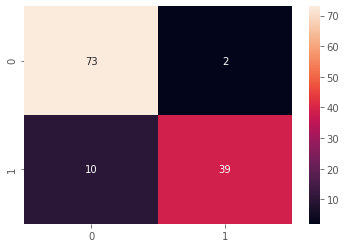

In [62]:
import seaborn as sns
sns.heatmap(rf_cm, annot = True)

Here, 0 indicates non - fraudulent transactions and 1 indicates fraudulent transactions. As seen from the confusion matrix, our RF model correctly predicted **80** transactions as non - fraudulent ( **True Negatives** ) and **38** transactions as fraudulent ( **True Positives** ). Whereas, **6** transactions which were fraudulent are predicted to be non - fraudulent ( **False Negatives** ) and **1** non - fraudulent transaction is predicted to be fraudulent ( **False positives** ). This can be visualised better as follows -

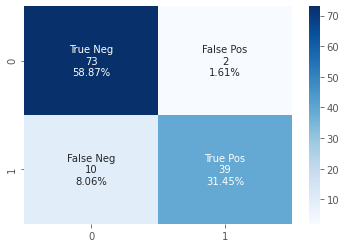

In [63]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')

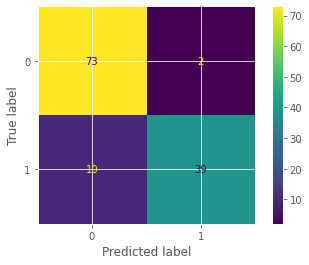

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForest_model , X_test, y_test)
plt.show()

Thus, random forest model performs fairly well for the given highly unbalanced dataset. But, we have 6 false negatives and a false positive here. That is, the fraudulent transactions are detected to be safe or normal ones, which is not a good outcome. Therefore, let us see if we can improve our results further by using the XGBoost Algorithm.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
xgb_predict = xgb.predict(X_test)

In [67]:
xgb_accuracy = accuracy_score(y_test, xgb_predict)
xgb_recall = recall_score(y_test, xgb_predict)
xgb_cm = confusion_matrix(y_test, xgb_predict)
xgb_auc = roc_auc_score(y_test, xgb_predict)

print("Model has a Score Accuracy: {:.3%}".format(xgb_accuracy))
print("Model has a Score Recall: {:.3%}".format(xgb_recall))
print("Model has a Score ROC AUC: {:.3%}".format(xgb_auc))

Model has a Score Accuracy: 91.935%
Model has a Score Recall: 87.755%
Model has a Score ROC AUC: 91.211%


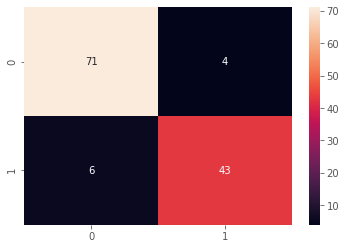

In [68]:
import seaborn as sns
sns.heatmap(xgb_cm, annot = True)

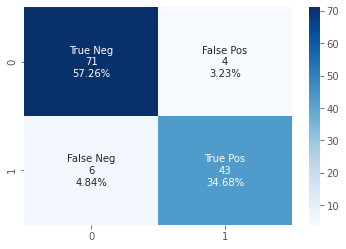

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                xgb_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     xgb_cm.flatten()/np.sum(xgb_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(xgb_cm, annot=labels, fmt='', cmap='Blues')

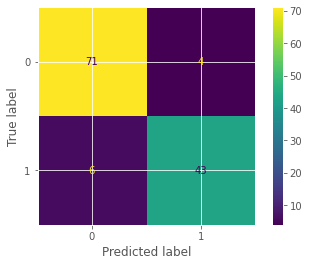

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb , X_test, y_test)
plt.show()

Thus, we find that XGBoost model outperforms RF model by a very slight margin. Thus, it would be appropriate to use any of the two for our task.